# ***The Sparks Foundations Internship Tasks***


Internship Type: Data Science and Business Analytics

Task 1: Prediction using Supervised ML

Objective: Predict the percentage of Student based on number of hours studied
    
Data: http://bit.ly/w-data

    Author  : Prajwal B P
    Date :    08-09-2021
        

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# Extracting data from the given link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


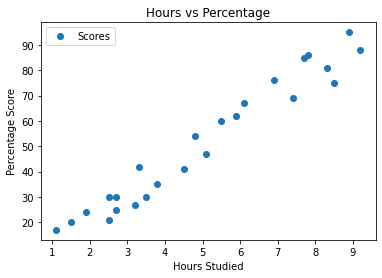

In [4]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [5]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

#The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [7]:
#Train
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


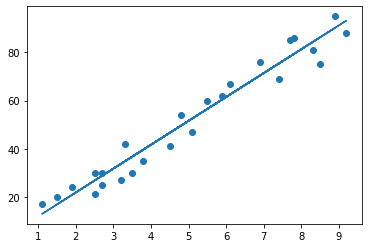

In [8]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [9]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

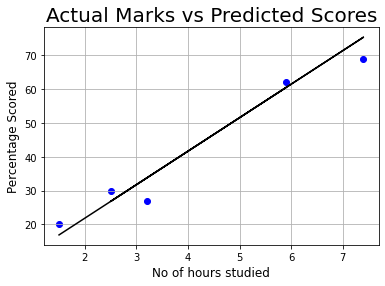

In [11]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, y_pred, color='black')
plt.title('Actual Marks vs Predicted Scores', size=20)
plt.ylabel('Percentage Scored', size=12)
plt.xlabel('No of hours studied', size=12)
plt.grid('True')
plt.show()

In [12]:
#Importing mean absolute error
from sklearn.metrics import mean_absolute_error
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

Mean absolute error:  4.183859899002975


What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [13]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692
